# **Persian Voice Assistant for Home Appliance Repairs**


## **Step 1: Loading Required Libraries**


In [ ]:
import time
import wave
import json
import streamlit as st
import pyaudio
import os
from vosk import Model, KaldiRecognizer
import tempfile
import re
import sounddevice as sd
import soundfile as sf
import torch
from transformers import pipeline
from scipy.io.wavfile import write as write_wav
import folium
from streamlit_folium import st_folium
import pandas as pd

#**Step 2: Loading TTS (Text-to-Speech) Model**

In [ ]:
# Code to load TTS model
def load_tts_model():
    if 'tts_pipeline' not in st.session_state:
        print("Loading TTS model (MMS)... ⏳")
        try:
            device = 0 if torch.cuda.is_available() else -1
            print(f"Using device: {'cuda' if device == 0 else 'cpu'}")
            st.session_state.tts_pipeline = pipeline(
                "text-to-speech", model="facebook/mms-tts-fas", device=device
            )
            print("Transformers MMS model loaded successfully.")
        except Exception as e:
            print(f"Error loading Transformers MMS model: {e}")
            st.session_state.tts_pipeline = None

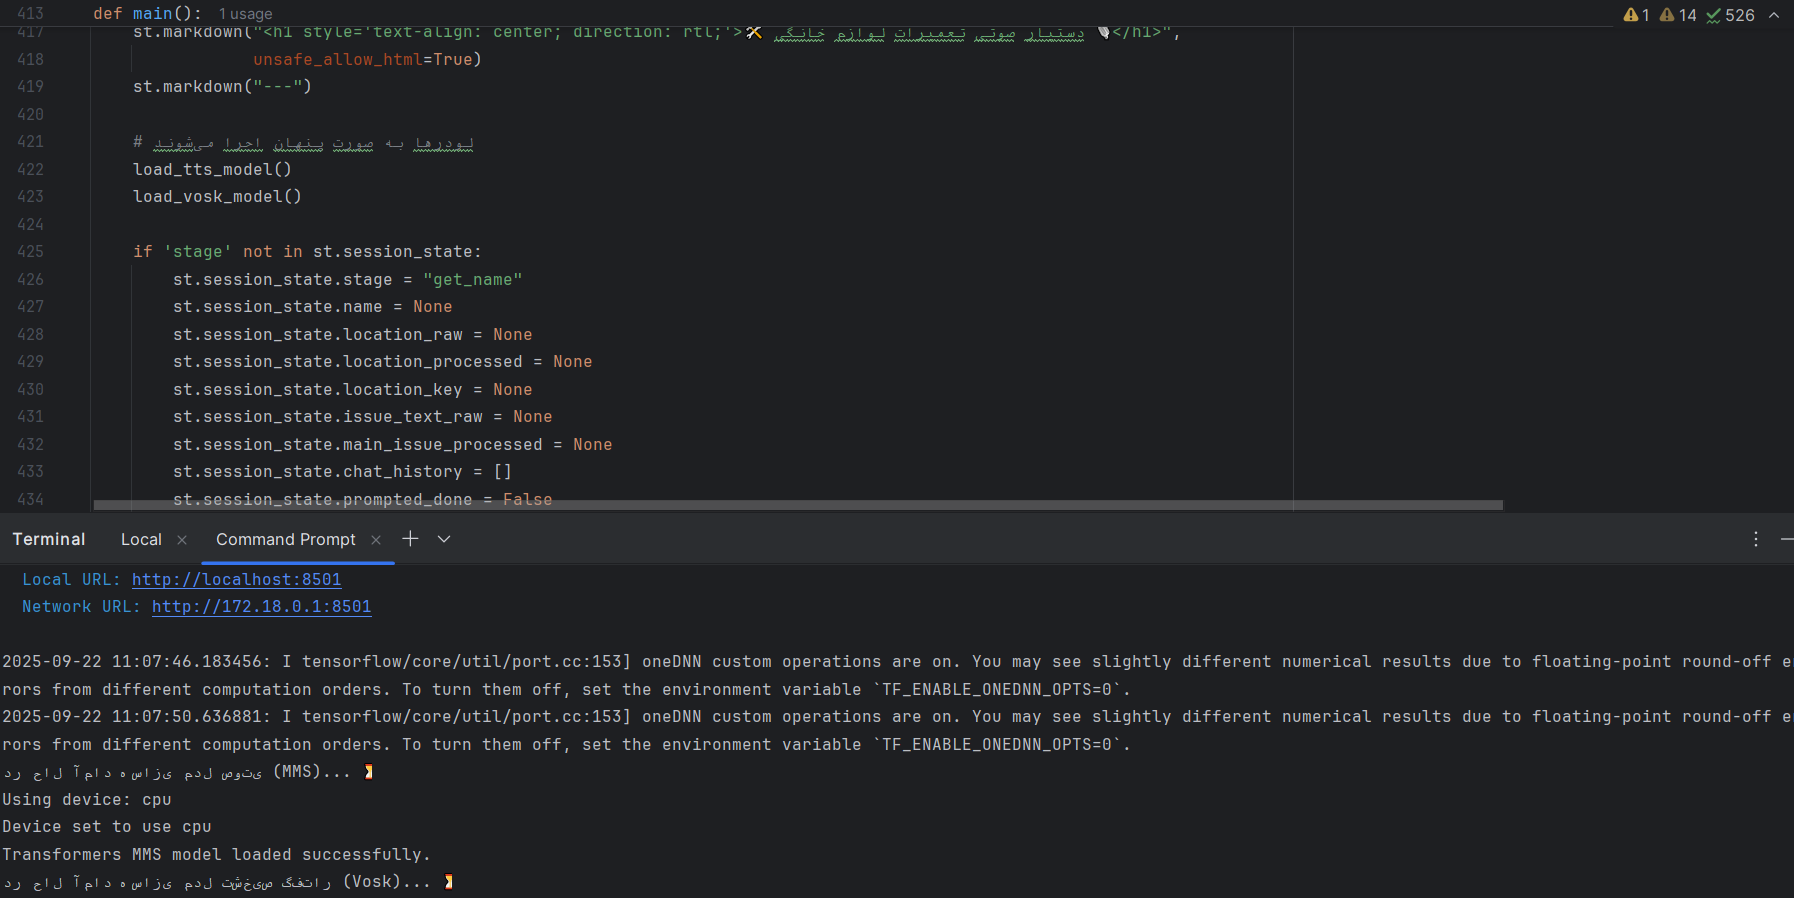

#**Step 3: Loading Vosk Speech Recognition Model**

In [ ]:
# Code to load Vosk model
def load_vosk_model():
    if 'vosk_model' not in st.session_state:
        print("Loading Speech Recognition Model (Vosk)... ⏳")
        large_model_path = r"C:\path\to\vosk-model-fa-0.5"
        small_model_path = r"C:\path\to\vosk-model-small-fa-0.42"
        model = None
        try:
            if os.path.exists(os.path.join(large_model_path, "am")):
                model = Model(large_model_path)
                print("Using Large Vosk model.")
            else:
                print("Large Vosk model not found.")
                raise FileNotFoundError("Large model not found")
        except Exception:
            print("Using Small Vosk model.")
            try:
                if os.path.exists(os.path.join(small_model_path, "am")):
                    model = Model(small_model_path)
                    print("Using Small Vosk model.")
                else:
                    raise FileNotFoundError("Small model not found")
            except Exception as e_small:
                print(f"Error: No Vosk models found: {e_small}")
                model = None
        st.session_state.vosk_model = model
        if model:
            print("Speech recognition model (Vosk) loaded successfully.")


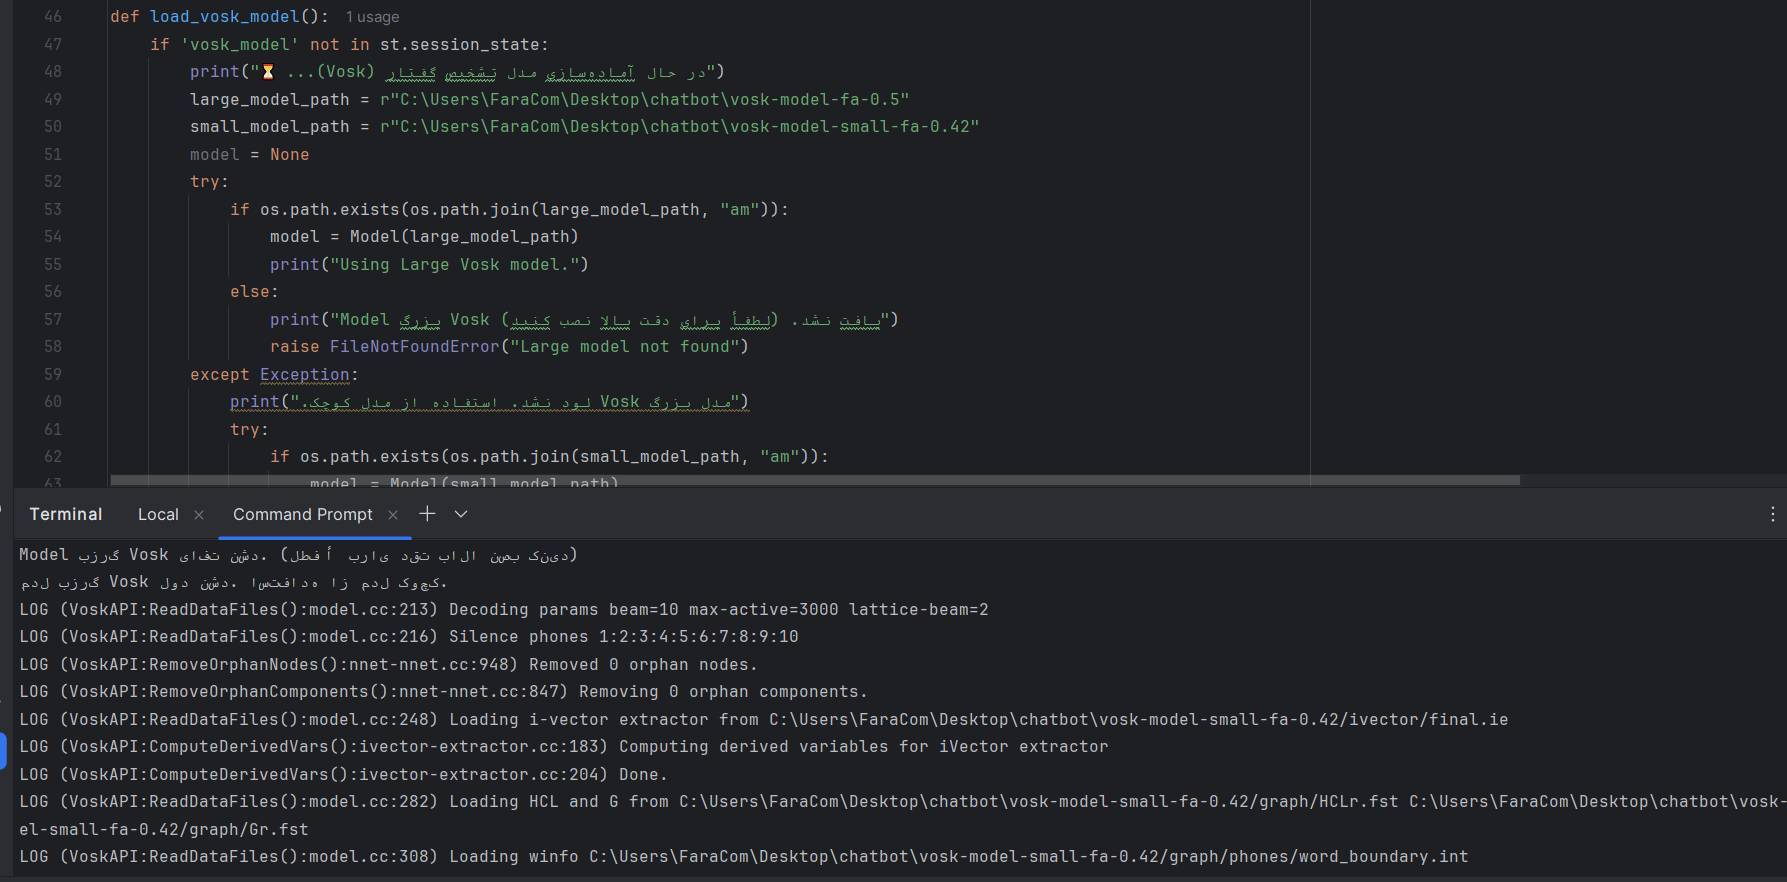

#**Step 4: Recording User Input**

In [ ]:
# Code to record audio
def record_audio(filename, duration=5):
    recognizer = pyaudio.PyAudio()
    stream = recognizer.open(format=pyaudio.paInt16, channels=1, rate=16000,
                             input=True, frames_per_buffer=1024)
    print(f"Recording for {duration} seconds...")
    frames = []
    for i in range(0, int(16000 / 1024 * duration)):
        data = stream.read(1024)
        frames.append(data)
    print("Recording finished.")
    stream.stop_stream()
    stream.close()
    recognizer.terminate()
    wf = wave.open(filename, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(recognizer.get_sample_size(pyaudio.paInt16))
    wf.setframerate(16000)
    wf.writeframes(b''.join(frames))
    wf.close()


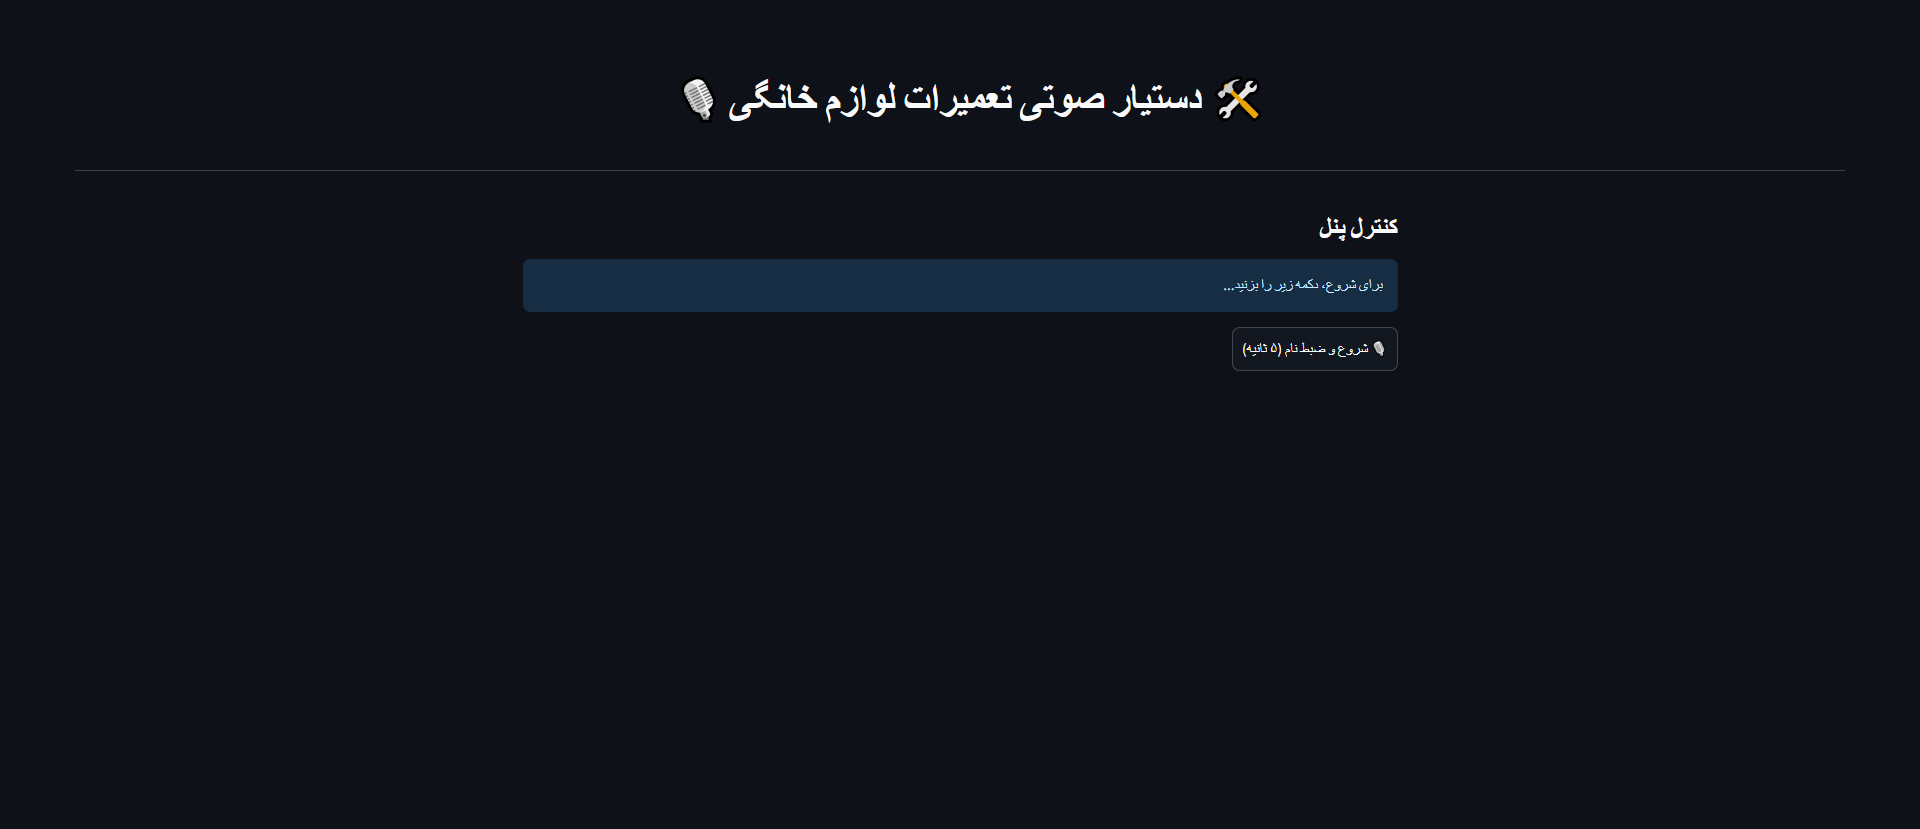

#**Step 5: Recognizing Audio Input**

In [ ]:
# Code to recognize audio
def recognize_audio_vosk(filename):
    if 'vosk_model' not in st.session_state or st.session_state.vosk_model is None:
        st.error("Speech recognition model not loaded.")
        return ""
    model = st.session_state.vosk_model
    wf = wave.open(filename, "rb")
    rec = KaldiRecognizer(model, wf.getframerate())
    rec.SetWords(True)
    while True:
        data = wf.readframes(4000)
        if len(data) == 0:
            break
        rec.AcceptWaveform(data)
    result = rec.FinalResult()
    return json.loads(result)["text"]


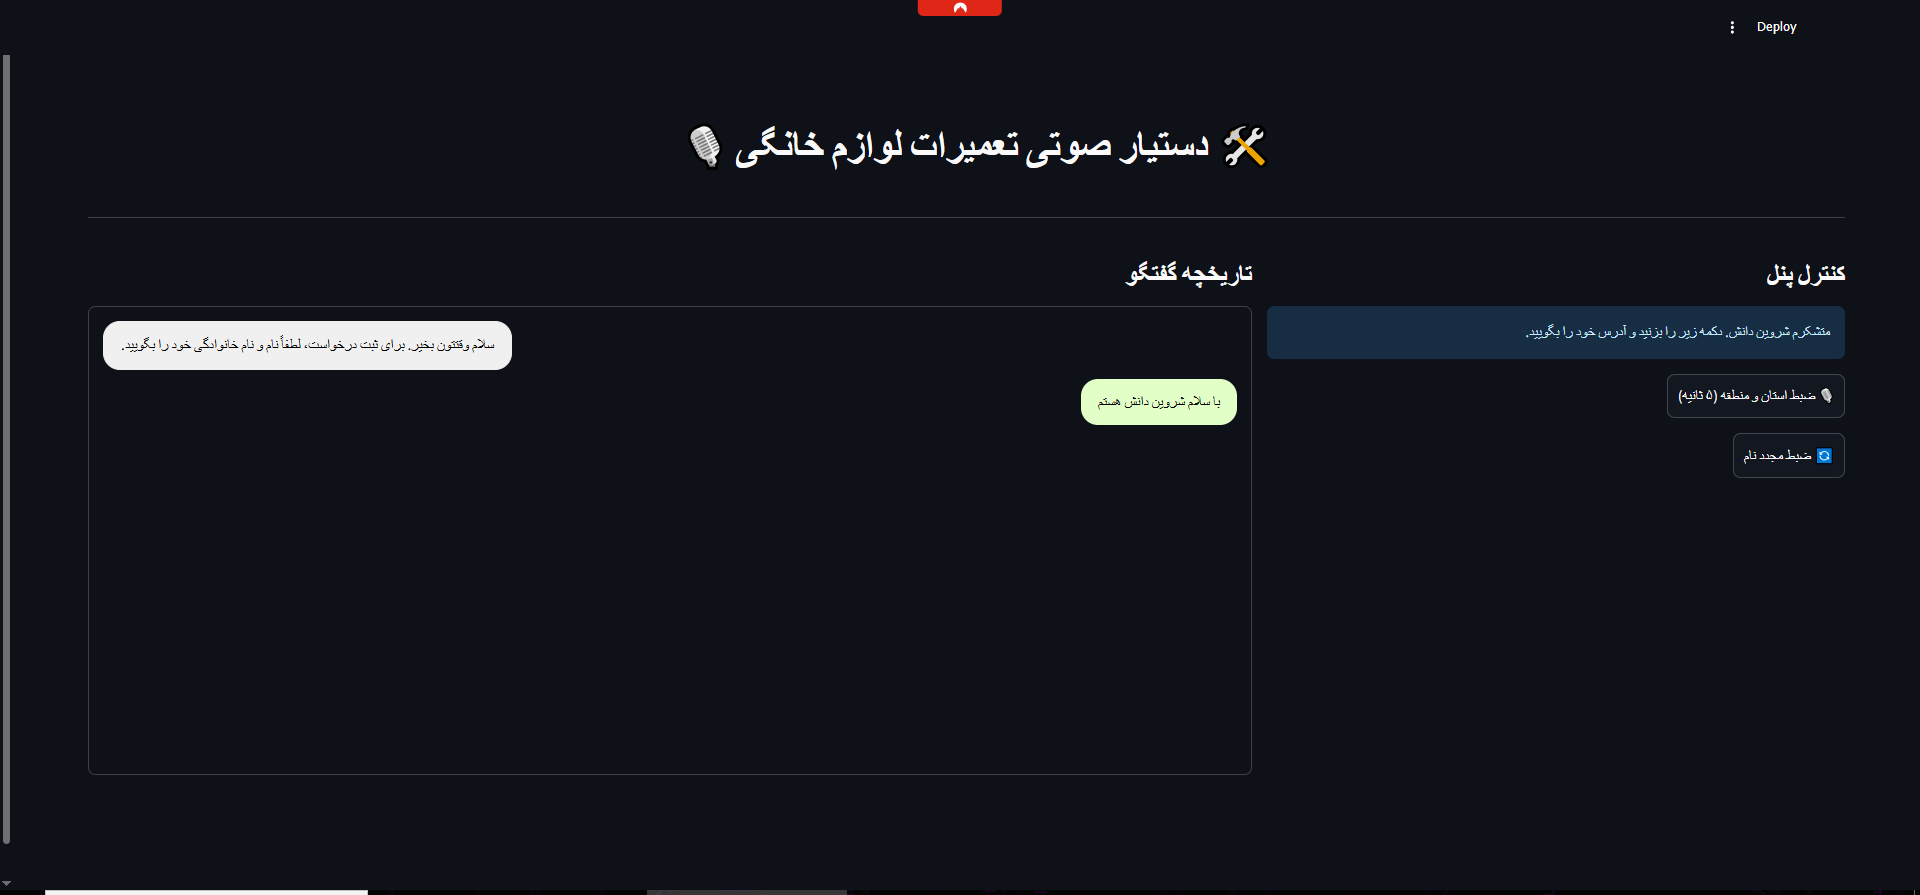

#**Step 6: Interfacing with the User**

In [ ]:
# Code to interact with user
def speak(text):
    if 'tts_pipeline' not in st.session_state or st.session_state.tts_pipeline is None:
        st.error("TTS model not loaded.")
        return
    try:
        pipeline = st.session_state.tts_pipeline
        with tempfile.NamedTemporaryFile(suffix=".wav", delete=False) as f:
            filename = f.name
        with st.spinner("... Generating audio..."):
            output = pipeline(text)
            write_wav(filename, rate=output["sampling_rate"], data=output["audio"].squeeze())
        data, fs = sf.read(filename, dtype='float32')
        sd.play(data, fs)
        duration_in_seconds = len(data) / fs
        time.sleep(duration_in_seconds + 0.3)
        os.remove(filename)
    except Exception as e:
        print(f"Error in text-to-speech: {e}")


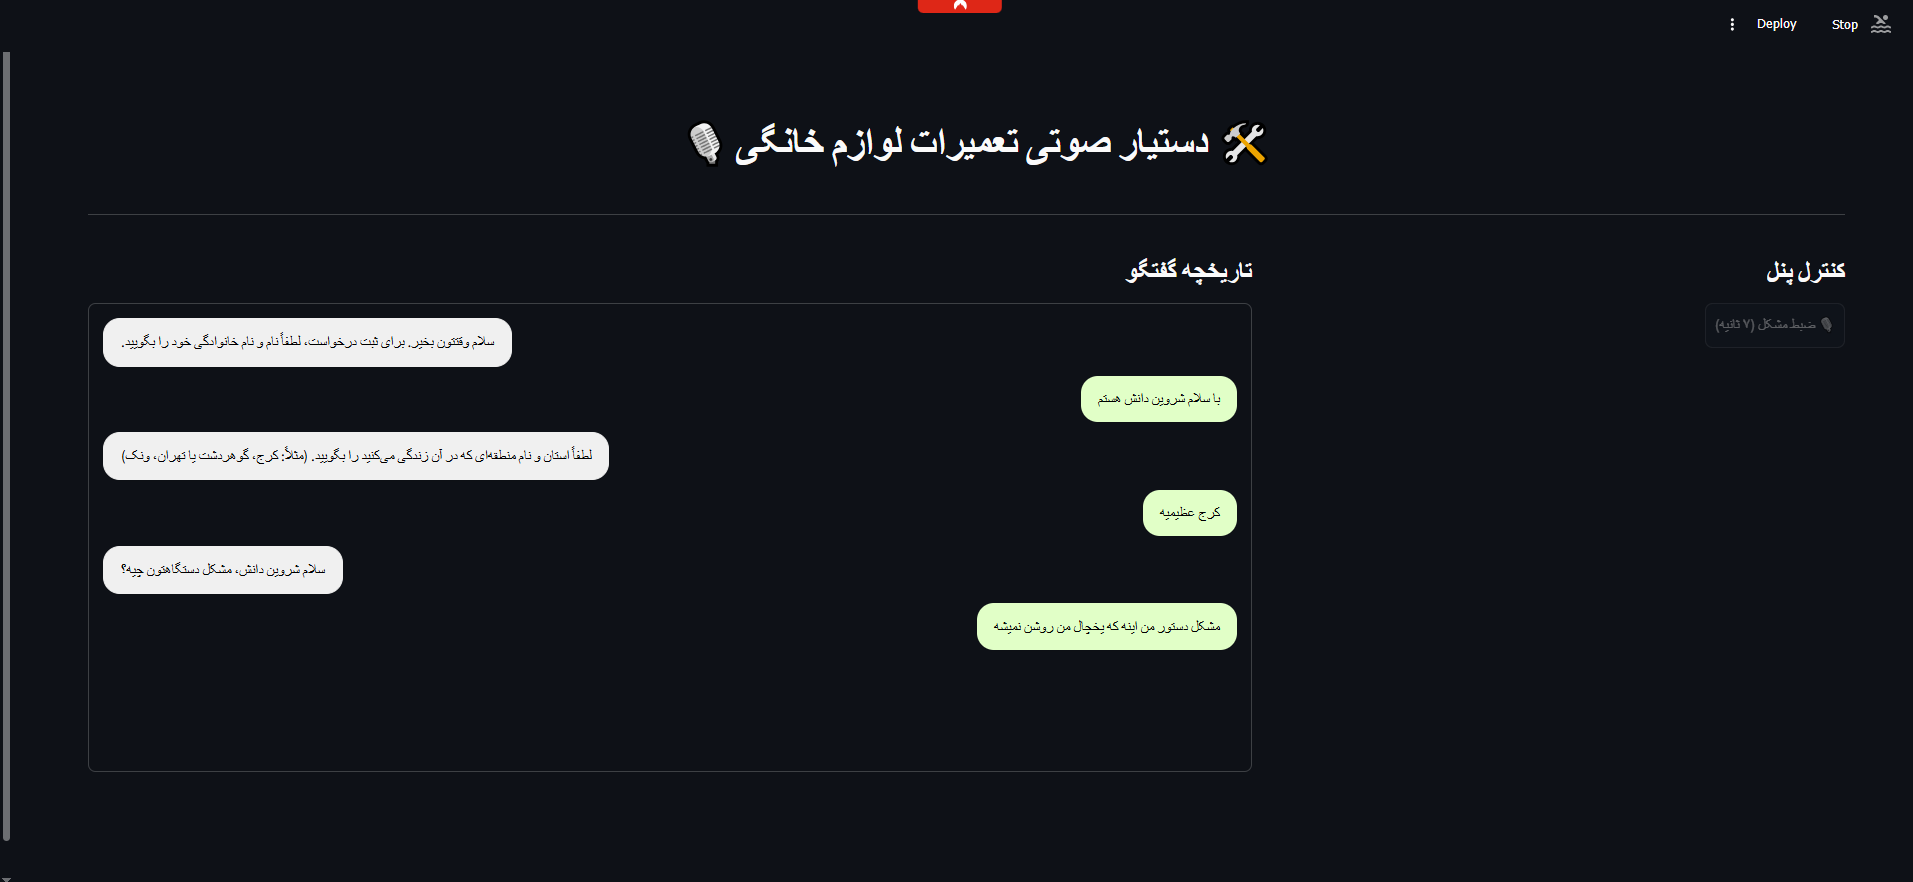

#**Step 7: Final Step - Submitting Request**

In [1]:
# Code for submitting the request
def main():
    st.set_page_config(page_title="Voice Assistant for Appliance Repair", page_icon="🛠️", layout="wide")
    apply_custom_css()
    # Further steps to collect data and submit request


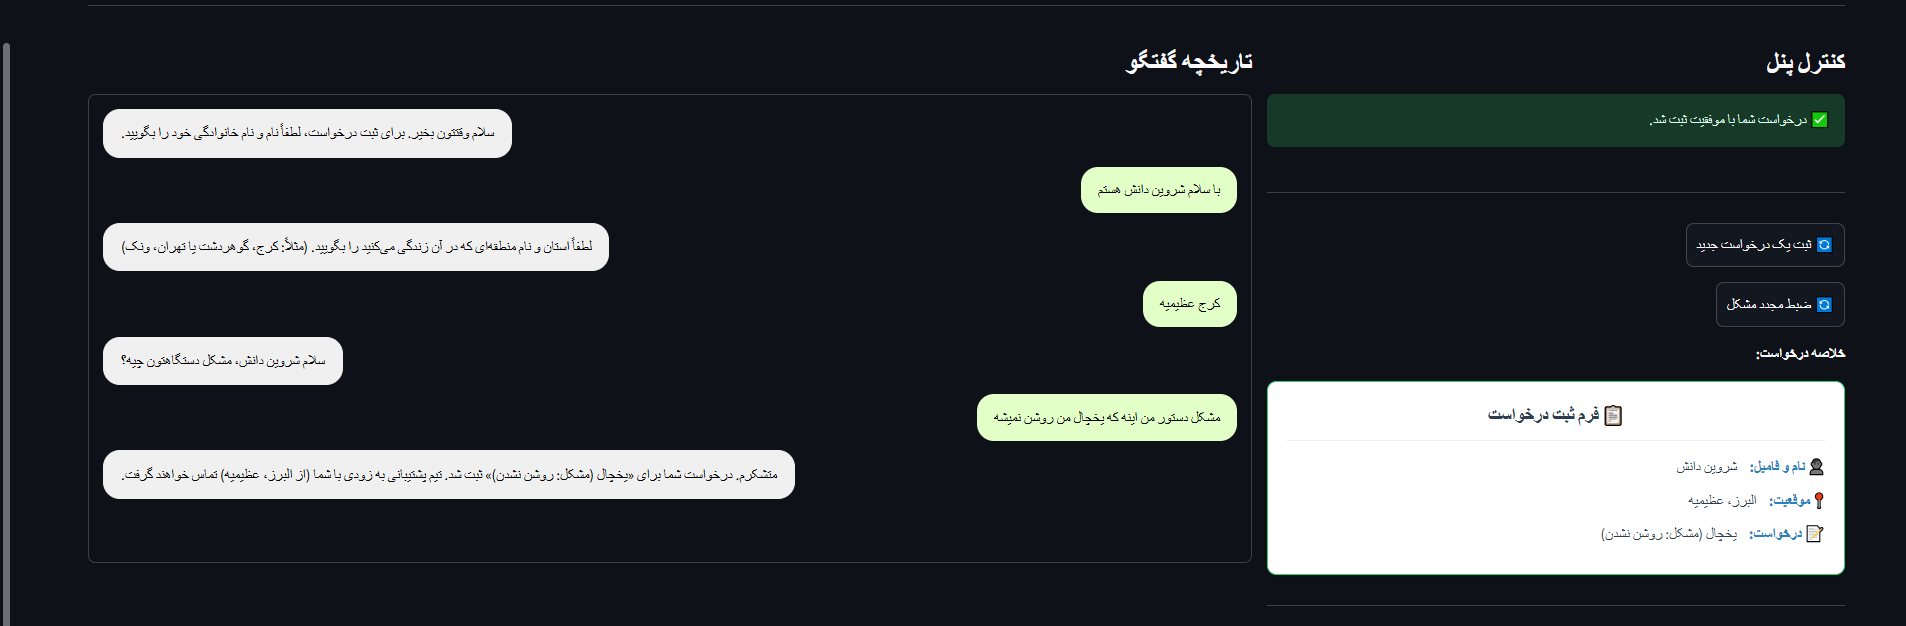

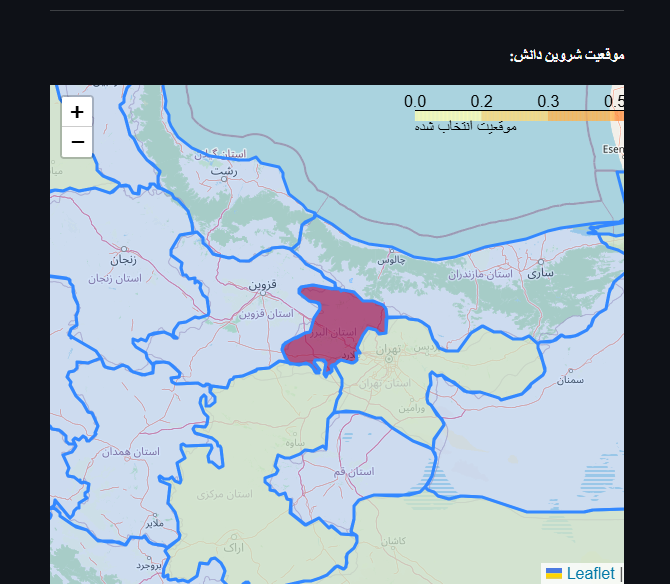

#**🛠️ A Persian voice assistant to help with diagnosing and repairing home appliances. Simply speak your issue and get guided through the process! 🎙️**

**Powerd By Miracle⚡**